In [1]:
import copy
import pygame
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

pygame 2.5.2 (SDL 2.28.3, Python 3.12.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Simple Contagion

-0.9109934292304952 0.9999999999999999
-0.8290679644731752 0.8403929459854051


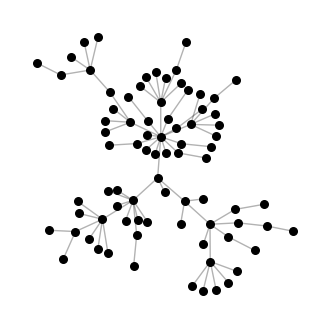

In [3]:
G = nx.barabasi_albert_graph(81, 1)
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(4, 4))
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='k')
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.axis('off')

xs, ys = zip(*pos.values())
print(min(xs), max(xs))
print(min(ys), max(ys))

In [4]:
pygame.init()

width = 400
height = 400
ticks = 1000
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()
font = pygame.font.Font(None, 24)
data = []

# initialize game
G = nx.barabasi_albert_graph(81, 1)
pos = nx.kamada_kawai_layout(G)

# G = nx.watts_strogatz_graph(81, 4, 0.1)
# pos = nx.kamada_kawai_layout(G)

# G = nx.grid_2d_graph(9, 9)
# pos = {n: np.array(n) for n in G.nodes}

# networkx borders
xs, ys = zip(*pos.values())
min_x = min(xs)
max_x = max(xs)
min_y = min(ys)
max_y = max(ys)

# other params
infection_chance = 0.03
spreading_chance = 0.7
recovery_chance = 0.1

for n in G.nodes:
    if np.random.random() < infection_chance:
        G.nodes[n]['state'] = 'i' # infected 
    else:
        G.nodes[n]['state'] = 's' # susceptible
    

running = True
for tick in range(ticks):

    # set the frames per second FPS
    clock.tick(3)

    # set the initial screen color in RGB
    screen.fill((255, 255, 255))

    # copy for simultanious update
    new_G = copy.deepcopy(G)

    # update game
    for n in G.nodes:
        if G.nodes[n]['state'] == 'i':
            # get neighbors and infect them
            for nb in G.neighbors(n):
                if G.nodes[nb]['state'] == 's':
                    if np.random.random() < spreading_chance:
                        new_G.nodes[nb]['state'] = 'i'
            
            # recovery with a certain probability
            if np.random.random() < recovery_chance:
                new_G.nodes[n]['state'] = 'r'

    # copy for simultanious update
    G = copy.deepcopy(new_G)

    # draw update nodes
    for u, v in G.edges:
        # map networkx pos to screen
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        
        screen_x1 = (x1 - min_x) / (max_x - min_x) * (width - 40) + 20
        screen_y1 = (y1 - min_y) / (max_y - min_y) * (height - 40) + 20
        screen_x2 = (x2 - min_x) / (max_x - min_x) * (width - 40) + 20
        screen_y2 = (y2 - min_y) / (max_y - min_y) * (height - 40) + 20

        # draw line
        pygame.draw.line(screen, (0, 0, 0, 0.9), (screen_x1, screen_y1), (screen_x2, screen_y2))

    # draw update edges
    for n in G.nodes:
        # colors 
        if G.nodes[n]['state'] == 'i':
            color = (255, 0, 0)
        if G.nodes[n]['state'] == 's':
            color = (155, 155, 155)
        if G.nodes[n]['state'] == 'r':
            color = (0, 0, 255)
            
        # map networkx pos to screen
        x, y = pos[n]
        screen_x = (x - min_x) / (max_x - min_x) * (width-40) + 20
        screen_y = (y - min_y) / (max_y - min_y) * (height-40) + 20
        center = screen_x, screen_y

        # draw circle
        pygame.draw.circle(screen, color, center, 7)
        pygame.draw.circle(screen, (0, 0, 0), center, 8, 1)

    # display and update the current tick
    text = font.render(str(tick), True, (0, 0, 0))
    screen.blit(text, (10, 10))
    
    # update the whole screen
    pygame.display.flip()

    # store data for each tick
    infected = 0
    susceptible = 0
    recovered = 0
    for n in G.nodes:
        if G.nodes[n]['state'] == 'i':
            infected += 1
        if G.nodes[n]['state'] == 's':
            susceptible += 1
        if G.nodes[n]['state'] == 'r':
            recovered += 1
    data.append([infected, susceptible, recovered])

    # handle the exit buttom
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            running = False
            
    # and break the loop
    if not running:
        break
    
pygame.quit()

In [164]:
infected, susceptible, recovered = zip(*data)